## Imports

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

from sklearn import tree, metrics, neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics, neighbors, linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix

## Dataset laden

In [361]:
df = pd.read_csv('laptopPrice.csv')

## Grundsätzliche Informationen anzeigen

Shape des Datasets anzeigen

In [362]:
df.shape

(823, 19)

Datentypen des Datasets anzeigen

In [363]:
df.dtypes

,0
brand,object
processor_brand,object
processor_name,object
processor_gnrtn,object
ram_gb,object
ram_type,object
ssd,object
hdd,object
os,object
os_bit,object


Informationen über Dataset anzeigen

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [365]:
df_encoded = pd.get_dummies(df, columns=['brand'])
df_encoded

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,...,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer
0,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,3,0,False,True,False,False,False,False,False,False
1,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,65,5,False,False,False,False,False,True,False,False
2,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,8,1,False,False,False,False,False,True,False,False
3,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,...,0,0,False,True,False,False,False,False,False,False
4,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,...,0,0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,...,0,0,False,True,False,False,False,False,False,False
819,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,...,0,0,False,True,False,False,False,False,False,False
820,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,...,0,0,False,True,False,False,False,False,False,False
821,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,...,0,0,False,True,False,False,False,False,False,False


Anzeigen, ob Null-Werte vorhanden sind

In [366]:
df.isnull().values.any()

False

Anzahl Null-Werte über alle Spalten zählen

In [367]:
df.isnull().sum().sum()

0

## n/a entfernen / füllen

Alle Null/Na Felder mit 0 auffülen

In [368]:
df.fillna(0)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


## Daten sortieren

In [369]:
df.sort_values(by='brand')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
609,APPLE,M1,M1,10th,8 GB,DDR4,512 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,101990,4 stars,809,91
604,APPLE,M1,M1,10th,16 GB,DDR4,256 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,104990,4 stars,45,4
605,APPLE,M1,M1,10th,8 GB,DDR4,256 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,85990,4 stars,6725,629
606,APPLE,M1,M1,10th,16 GB,DDR4,512 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,149990,4 stars,640,70
607,APPLE,M1,M1,10th,8 GB,DDR4,512 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,125990,4 stars,399,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,acer,AMD,Ryzen 5,Not Available,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,No,49990,4 stars,6,1
712,acer,AMD,Ryzen 5,Not Available,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,49990,4 stars,47,6
439,acer,Intel,Core i5,8th,8 GB,DDR4,0 GB,1024 GB,Windows,64-bit,2 GB,Casual,1 year,No,No,72964,4 stars,18,6
31,acer,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,No,38990,3 stars,0,0


## Duplikate entfernen

Anzeigen der Zeilen welche als Duplikate identifiziert werden

In [370]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
818,False
819,False
820,False
821,False


Entfernen der Duplikate

In [371]:
df.drop_duplicates(inplace=True)

## Preis (Int64) in Float umwandeln

In [372]:
df.Price = df.Price.apply(lambda x: float(x))

## Preis von Rupee in CHF Umwandeln

In [373]:
df.Price = df['Price'] * 0.010

## Informationen über das Dataset ausgeben

Informationen ausgeben

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              802 non-null    object 
 1   processor_brand    802 non-null    object 
 2   processor_name     802 non-null    object 
 3   processor_gnrtn    802 non-null    object 
 4   ram_gb             802 non-null    object 
 5   ram_type           802 non-null    object 
 6   ssd                802 non-null    object 
 7   hdd                802 non-null    object 
 8   os                 802 non-null    object 
 9   os_bit             802 non-null    object 
 10  graphic_card_gb    802 non-null    object 
 11  weight             802 non-null    object 
 12  warranty           802 non-null    object 
 13  Touchscreen        802 non-null    object 
 14  msoffice           802 non-null    object 
 15  Price              802 non-null    float64
 16  rating             802 non-null

Alle möglichen Brands ausgeben

In [375]:
df.brand.unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

Alle möglichen Processor-Brands

In [376]:
df.processor_brand.unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

Alle möglichen Processor Names

In [377]:
df.processor_name.unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

Alle möglichen Processor Generations

In [378]:
df.processor_gnrtn.unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

Alle möglichen Anzahlen von Ram

In [379]:
df.ram_gb.unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

Alle möglichen Ram typen

In [380]:
df.ram_type.unique()

array(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],
      dtype=object)

Alle möglichkeiten von SSD Speicherplatz

In [381]:
df.ssd.unique()

array(['0 GB', '512 GB', '256 GB', '128 GB', '1024 GB', '2048 GB',
       '3072 GB'], dtype=object)

Alle möglichkeiten an HDD Speicherplatz

In [382]:
df.hdd.unique()

array(['1024 GB', '0 GB', '512 GB', '2048 GB'], dtype=object)

Alle möglichen Betriebssysteme

In [383]:
df.os.unique()

array(['Windows', 'DOS', 'Mac'], dtype=object)

Alle Betriebssystem Bitraten

In [384]:
df.os_bit.unique()

array(['64-bit', '32-bit'], dtype=object)

Alle möglichen Grafikkarten Speicher

In [385]:
df.graphic_card_gb.unique()

array(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'], dtype=object)

Alle Gewichts-Kategorien

In [386]:
df.weight.unique()

array(['Casual', 'ThinNlight', 'Gaming'], dtype=object)

Alle Garantie längen

In [387]:
df.warranty.unique()

array(['No warranty', '1 year', '2 years', '3 years'], dtype=object)

Touchscreen?

In [388]:
df.Touchscreen.unique()

array(['No', 'Yes'], dtype=object)

MSOffice ?

In [389]:
df.msoffice.unique()

array(['No', 'Yes'], dtype=object)

Alle Ratings

In [390]:
df.rating.unique()

array(['2 stars', '3 stars', '4 stars', '5 stars', '1 star'], dtype=object)

statischer Grundwerte über alle nummerischen Felder ausgeben

In [391]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,766.255436,299.84414,36.089776
std,452.329844,1001.78442,118.313553
min,169.900000,0.00000,0.000000
25%,459.900000,0.00000,0.000000
50%,639.900000,17.00000,2.000000
75%,895.250000,140.25000,18.000000
max,4419.900000,15279.00000,1947.000000


Boxplot für Price

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ff56acb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7900406fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79004059c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7900407dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79004044f0>],
 'means': []}

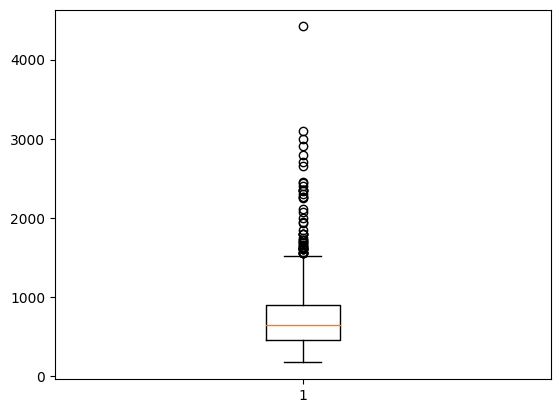

In [392]:
plt.boxplot(df.Price)

Ratings Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7900838430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7900838e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f790083b010>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7900838c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79008390c0>],
 'means': []}

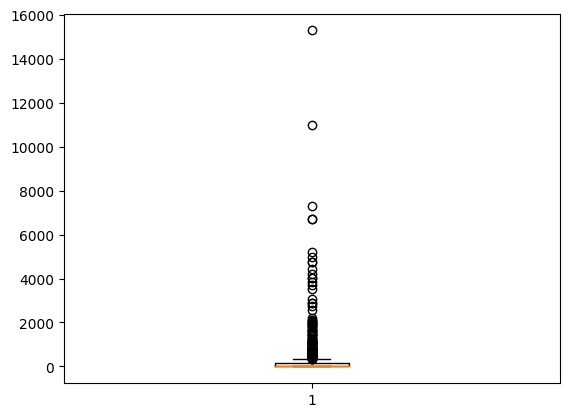

In [393]:
plt.boxplot(df['Number of Ratings'])

(array([436.,  86.,  27.,  24.,  17.,  15.,  12.,  13.,  11.,   5.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <BarContainer object of 10 artists>)

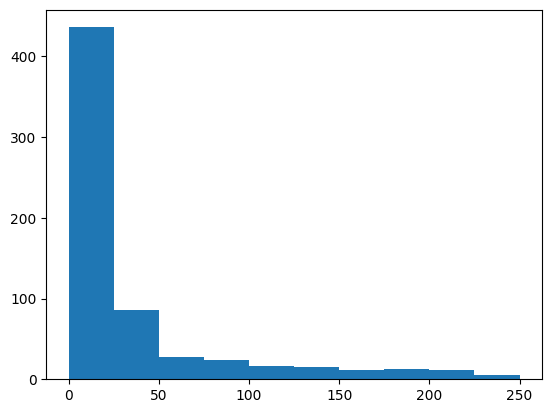

In [394]:
ratings250 = df[df['Number of Ratings'] <= 250]
plt.hist(ratings250['Number of Ratings'])

Reviews BoxPlot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ff410f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ff411450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ff410c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ff411990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ff411c30>],
 'means': []}

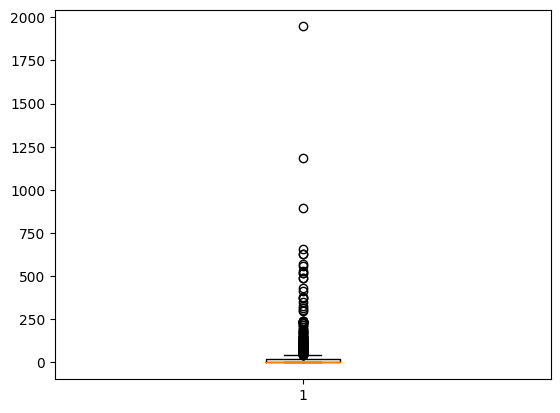

In [395]:
plt.boxplot(df['Number of Reviews'])

(array([550.,  58.,  34.,  22.,  18.,  10.,  12.,   7.,   7.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

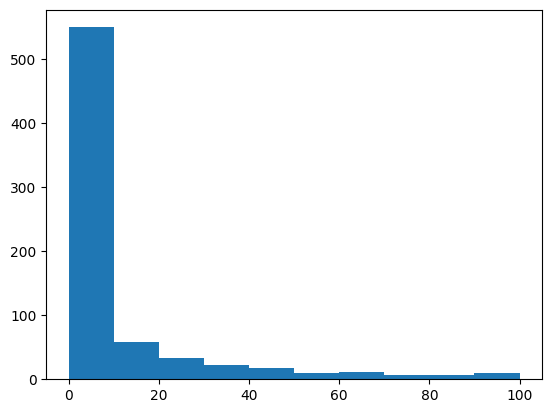

In [396]:
reviews100 = df[df['Number of Reviews'] <= 100]
plt.hist(reviews100['Number of Reviews'])

(array([349., 300.,  92.,  38.,   8.,  10.,   4.,   0.,   0.,   1.]),
 array([ 169.9,  594.9, 1019.9, 1444.9, 1869.9, 2294.9, 2719.9, 3144.9,
        3569.9, 3994.9, 4419.9]),
 <BarContainer object of 10 artists>)

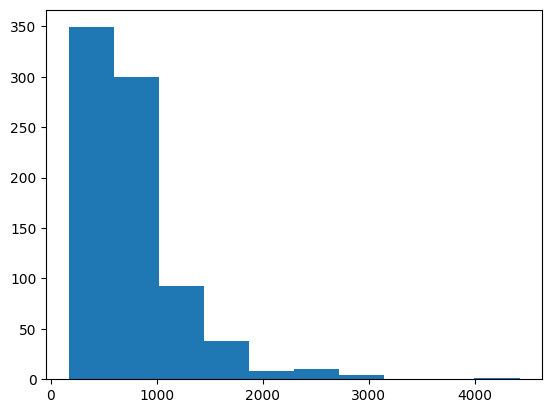

In [397]:
plt.hist(df.Price)

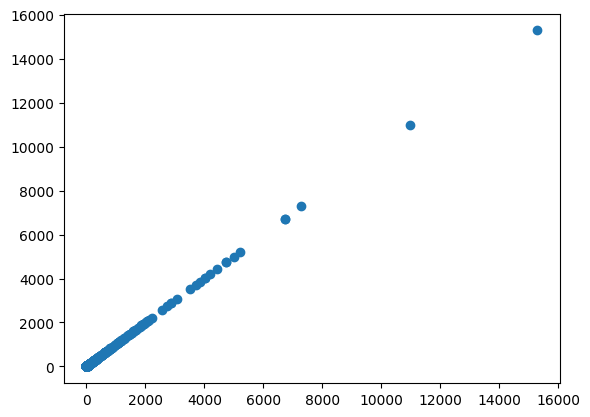

In [398]:
plt.scatter(df['Number of Ratings'], df['Number of Ratings'])

## Gruppierungen

In [399]:
df_brands = df.groupby('brand')
df_brands.first()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
brand,,,,,,,,,,,,,,,,,,
APPLE,Intel,Core i5,10th,8 GB,LPDDR4X,512 GB,0 GB,Mac,64-bit,0 GB,Casual,1 year,No,No,1599.90,4 stars,32,5
ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,346.49,2 stars,3,0
Avita,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,174.90,3 stars,1120,196
DELL,Intel,Core i3,10th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,394.90,4 stars,1267,171
HP,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,564.90,3 stars,0,0
Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,389.99,3 stars,65,5
MSI,Intel,Core i3,10th,4 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,389.90,4 stars,53,11
acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,599.90,4 stars,1946,240


In [400]:
for brand, group in df_brands:
  print(brand)
  print(group.shape)

APPLE
(23, 19)
ASUS
(243, 19)
Avita
(6, 19)
DELL
(149, 19)
HP
(136, 19)
Lenovo
(144, 19)
MSI
(50, 19)
acer
(51, 19)


<Axes: xlabel='brand', ylabel='count'>

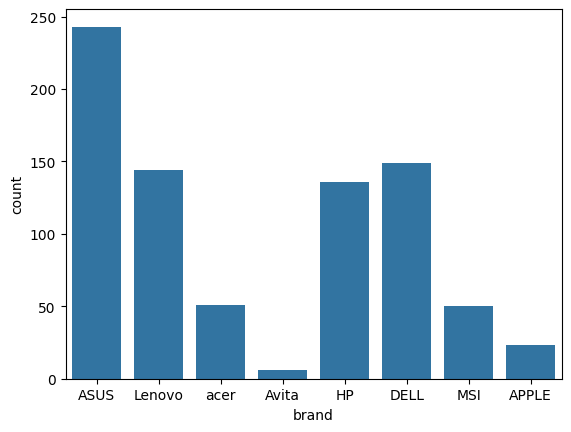

In [401]:
sns.countplot(df, x="brand")

In [402]:
df_processors = df.groupby('processor_brand')
for processor_name, group in df_processors:
  print(processor_name)
  print(group.shape)

AMD
(189, 19)
Intel
(594, 19)
M1
(19, 19)


<Axes: xlabel='processor_brand', ylabel='count'>

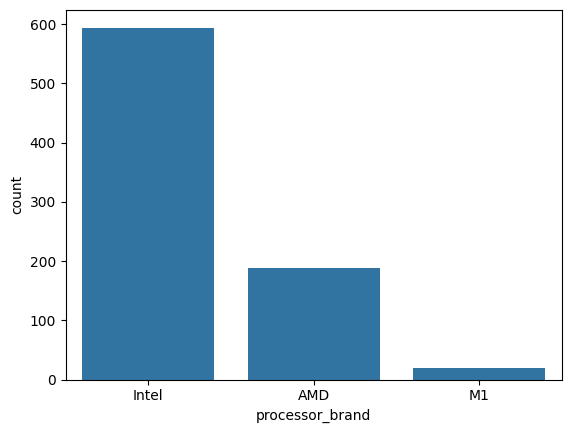

In [403]:
sns.countplot(df, x="processor_brand")

In [404]:
df_brand_processors = df.groupby(['brand', 'processor_brand'])
df_brand_processors.first().head(10)

processor_name processor_gnrtn ram_gb ram_type     ssd  \
brand  processor_brand                                                          
APPLE  Intel                  Core i5            10th   8 GB  LPDDR4X  512 GB   
       M1                          M1            10th   8 GB     DDR4  256 GB   
ASUS   AMD                    Ryzen 3   Not Available   8 GB     DDR4  256 GB   
       Intel                  Core i3            10th   4 GB     DDR4    0 GB   
Avita  Intel             Celeron Dual   Not Available   4 GB     DDR4    0 GB   
DELL   AMD                    Ryzen 3   Not Available   8 GB     DDR4  256 GB   
       Intel                  Core i3            10th   8 GB     DDR4  256 GB   
HP     AMD                    Ryzen 3   Not Available   8 GB     DDR4  256 GB   
       Intel                  Core i3            11th   8 GB     DDR4  256 GB   
Lenovo AMD                    Ryzen 3   Not Available   4 GB     DDR4    0 GB   

                            hdd       os  os_bit graphic_card_gb      weight  \
brand  processor_brand                                                         
APPLE  Intel               0 GB      Mac  64-bit            0 GB      Casual   
       M1                  0 GB      Mac  64-bit            0 GB      Casual   
ASUS   AMD                 0 GB  Windows  64-bit            0 GB  ThinNlight   
       Intel            1024 GB  Windows  64-bit            0 GB      Casual   
Avita  Intel             512 GB  Windows  64-bit            0 GB      Casual   
DELL   AMD                 0 GB  Windows  64-bit            0 GB  ThinNlight   
       Intel               0 GB  Windows  64-bit            0 GB  ThinNlight   
HP     AMD                 0 GB  Windows  64-bit            0 GB  ThinNlight   
       Intel               0 GB  Windows  64-bit            0 GB      Casual   
Lenovo AMD              1024 GB  Windows  64-bit            0 GB      Casual   

                           warranty Touchscreen msoffice    Price   rating  \
brand  processor_brand                                                       
APPLE  Intel                 1 year          No       No  1599.90  4 stars   
       M1                    1 year          No       No   859.90  4 stars   
ASUS   AMD                   1 year          No       No   359.90  4 stars   
       Intel            No warranty          No       No   346.49  2 stars   
Avita  Intel            No warranty          No       No   174.90  3 stars   
DELL   AMD              No warranty          No       No   394.90  4 stars   
       Intel                 1 year          No      Yes   394.90  4 stars   
HP     AMD                   1 year          No       No   379.90  4 stars   
       Intel                 1 year         Yes       No   564.90  3 stars   
Lenovo AMD              No warranty          No       No   349.90  3 stars   

                        Number of Ratings  Number of Reviews  
brand  processor_brand                                        
APPLE  Intel                           32                  5  
       M1                            6725                629  
ASUS   AMD                           2886                375  
       Intel                            3                  0  
Avita  Intel                         1120                196  
DELL   AMD                             34                  4  
       Intel                         1267                171  
HP     AMD                           2214                241  
       Intel                            0                  0  
Lenovo AMD                             38                  6

In [405]:

print(df_brands['Price'].mean())

brand
APPLE     1570.813043
ASUS       794.260206
Avita      563.465000
DELL       607.889530
HP         736.402721
Lenovo     729.202083
MSI        987.130200
acer       724.200392
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='brand'>

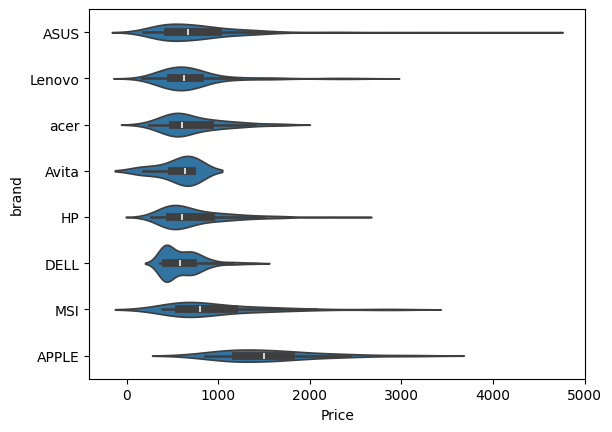

In [406]:
sns.violinplot(data=df, x="Price", y="brand")

In [407]:
df_weight = df.groupby('weight')
df_weight.describe()

Price                                                          \
            count        mean         std     min    25%     50%      75%   
weight                                                                      
Casual      509.0  851.425737  504.284872  169.90  519.9  729.90  1049.90   
Gaming       39.0  742.140513  163.212622  544.90  629.9  719.90   799.95   
ThinNlight  254.0  599.282205  300.800265  317.99  419.9  525.66   663.65   

                    Number of Ratings              ...                   \
                max             count        mean  ...     75%      max   
weight                                             ...                    
Casual      4419.90             509.0  275.064833  ...  104.00  15279.0   
Gaming      1399.90              39.0  457.179487  ...  406.50   3850.0   
ThinNlight  2448.01             254.0  325.342520  ...  195.25   7291.0   

           Number of Reviews                                                \
                       count       mean         std  min  25%   50%    75%   
weight                                                                       
Casual                 509.0  34.125737  129.195908  0.0  0.0   2.0  14.00   
Gaming                  39.0  52.871795   96.795819  0.0  2.0  10.0  47.50   
ThinNlight             254.0  37.448819   96.657515  0.0  0.0   3.5  21.75   

                    
               max  
weight              
Casual      1947.0  
Gaming       412.0  
ThinNlight   895.0  

[3 rows x 24 columns]

<Axes: xlabel='Price', ylabel='weight'>

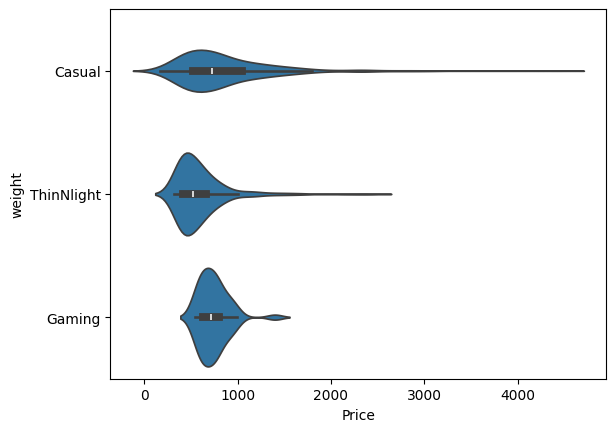

In [408]:
sns.violinplot(data=df, x="Price", y="weight")

<Axes: xlabel='Price', ylabel='rating'>

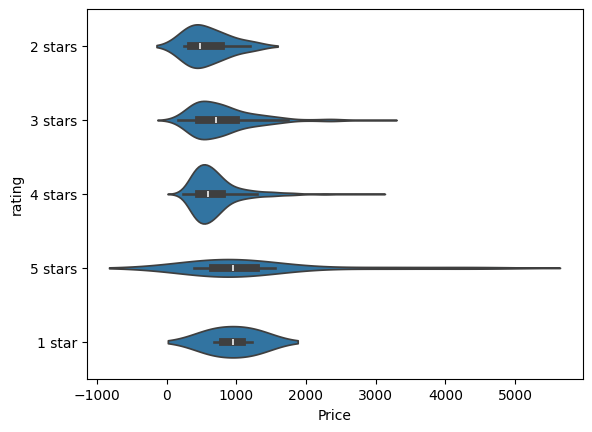

In [409]:
sns.violinplot(data=df, x="Price", y="rating")

## Korrelation

In [410]:
df.corr(numeric_only=True)

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


## Modelle

Kategorien Konvertieren

In [411]:
df_ex_onehot = pd.get_dummies(df, columns=['brand', 'processor_brand', 'weight', 'ram_gb', 'graphic_card_gb', 'processor_name', 'ssd', 'rating'])
df_ex_onehot

,processor_gnrtn,ram_type,hdd,os,os_bit,warranty,Touchscreen,msoffice,Price,Number of Ratings,...,ssd_128 GB,ssd_2048 GB,ssd_256 GB,ssd_3072 GB,ssd_512 GB,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,10th,DDR4,1024 GB,Windows,64-bit,No warranty,No,No,346.49,3,...,False,False,False,False,False,False,True,False,False,False
1,10th,DDR4,1024 GB,Windows,64-bit,No warranty,No,No,389.99,65,...,False,False,False,False,False,False,False,True,False,False
2,10th,DDR4,1024 GB,Windows,64-bit,No warranty,No,No,399.99,8,...,False,False,False,False,False,False,False,True,False,False
3,10th,DDR4,0 GB,Windows,32-bit,No warranty,No,No,699.90,0,...,False,False,False,False,True,False,False,True,False,False
4,Not Available,DDR4,512 GB,Windows,64-bit,No warranty,No,No,269.90,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,Not Available,DDR4,0 GB,Windows,64-bit,1 year,No,No,1359.90,0,...,False,False,False,False,False,False,False,True,False,False
819,Not Available,DDR4,0 GB,Windows,64-bit,1 year,No,No,1449.90,0,...,False,False,False,False,False,False,False,True,False,False
820,Not Available,DDR4,0 GB,Windows,64-bit,1 year,No,No,1499.90,0,...,False,False,False,False,False,False,False,True,False,False
821,Not Available,DDR4,0 GB,Windows,64-bit,1 year,No,No,1429.90,0,...,False,False,False,False,False,False,False,True,False,False


Datenset in X und Y aufteilen, Test-Train-Split erstellen

In [412]:
X_price = df_ex_onehot.drop(['Price', 'processor_gnrtn', 'ram_type', 'hdd', 'os', 'os_bit', 'warranty', 'Touchscreen', 'msoffice'], axis=1)
y_price = df_ex_onehot['Price']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.4, shuffle=True)

### Modell 1

In [413]:
price_clf_linear = linear_model.LinearRegression()
price_clf_linear.fit(X_price_train, y_price_train)

predict_price_linear = price_clf_linear.predict(X_price_test)

In [414]:
print("MSE: %.2f" % mean_squared_error(y_price_test, predict_price_linear))
print("R2-Score: %.2f" % r2_score(y_price_test, predict_price_linear))

MSE: 45758.91
R2-Score: 0.71


In [415]:
pd.DataFrame([predict_price_linear, y_price_test]).transpose().head(10)

,0,1
0,1031.113830,1099.90
1,806.871030,799.90
2,973.354023,579.90
3,927.815800,619.90
4,1615.197593,2349.90
5,861.959158,1299.99
6,153.317291,239.90
7,709.369515,839.90
8,529.287668,369.90
9,628.150687,623.17


### Modell 2

In [416]:
price_clf_ridge = linear_model.Ridge()
price_clf_ridge.fit(X_price_train, y_price_train)

predict_price_ridge = price_clf_ridge.predict(X_price_test)

In [417]:
print("MSE: %.2f" % mean_squared_error(y_price_test, predict_price_ridge))
print("R2-Score: %.2f" % r2_score(y_price_test, predict_price_ridge))

MSE: 46064.67
R2-Score: 0.71


In [418]:
pd.DataFrame([predict_price_ridge, y_price_test]).transpose().head(10)

,0,1
0,1048.858953,1099.90
1,821.626499,799.90
2,918.654714,579.90
3,886.492239,619.90
4,1636.426965,2349.90
5,849.352082,1299.99
6,206.356872,239.90
7,706.833823,839.90
8,525.372341,369.90
9,618.538622,623.17


### Modell 3

In [419]:
price_clf_tree = tree.DecisionTreeRegressor(max_depth=2)
price_clf_tree.fit(X_price_train, y_price_train)

predict_price_tree = price_clf_tree.predict(X_price_test)

In [420]:
print("MSE: %.2f" % mean_squared_error(y_price_test, predict_price_tree))
print("R2-Score: %.2f" % r2_score(y_price_test, predict_price_tree))

MSE: 101081.48
R2-Score: 0.36


In [421]:
pd.DataFrame([predict_price_tree, y_price_test]).transpose().head(10)

,0,1
0,683.802029,1099.90
1,683.802029,799.90
2,683.802029,579.90
3,683.802029,619.90
4,1348.372333,2349.90
5,683.802029,1299.99
6,683.802029,239.90
7,683.802029,839.90
8,683.802029,369.90
9,683.802029,623.17
